<a href="https://colab.research.google.com/github/DSilvia08/Para-entregar/blob/main/Clase18062024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]

#Mètodo de Monte carlo



In [29]:
#Importamos las librerías a ocupar
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
from scipy.stats import norm
from scipy import stats

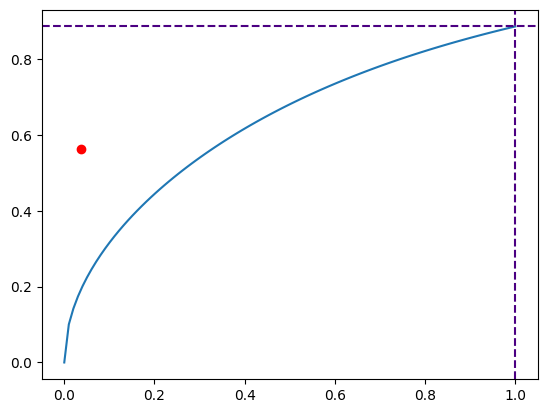

In [3]:
x=np.linspace(0,1,100) #rango de eje de las x
u_1=rnd.uniform(1, 0)
u_2=np.sqrt(np.arctan(1))*rnd.uniform(0,1)
plt.plot(x,np.sqrt(np.arctan(x))) #f(x)
plt.scatter(u_1,u_2,color="red") #Grafica un punto, ya sea fuera o dentro de lafunción
plt.axvline(1,color="indigo", linestyle="--")
plt.axhline(np.sqrt(np.arctan(1)),color="indigo", linestyle="--")
plt.show()

In [4]:
def estimación(n): #ESta función retorna varias listas
 lista1=[] #Estimación de pi
 x_1=[] #Valores para x,y en caso de éxito
 y_1=[]
 x_2=[] #Valores para x,y en caso contrario
 y_2=[]
 éxitos=0 #contador para el número de éxitos
 for i in range(n):
  u_1=rnd.uniform(0,1)
  u_2=rnd.uniform(0,1)
  if u_2<=np.sqrt(np.arctan(u_1)):
   éxitos+=1 #éxito
   x_1.append(u_1)
   y_1.append(u_2)
  else: #caso contrario
   if u_2<=np.sqrt(np.arctan(1)): #para que los rechazos estèn bajo
                                  #el valor maximo np.sqrt(np.arctan(1))
    x_2.append(u_1)
    y_2.append(u_2)
  prob=éxitos/(i+1) #probabilidad de pi/4
  lista1.append(prob)
 return lista1,x_1,y_1,x_2,y_2

In [5]:
G,x_1,y_1,x_2,y_2=estimación(1000)

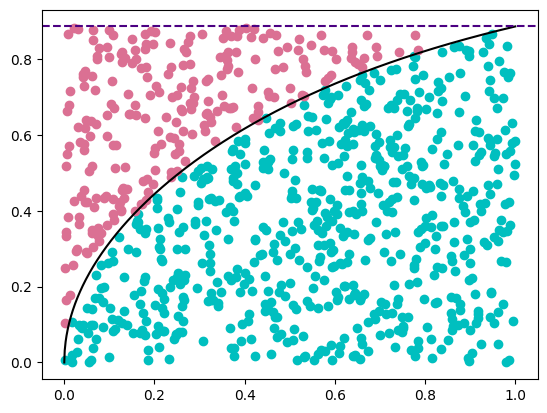

In [6]:
x=np.linspace(0,1,1000) #Rango del eje de las x
plt.plot(x,np.sqrt(np.arctan(x)),color="black")
plt.scatter(x_1,y_1,color="c") #Éxitos
plt.scatter(x_2,y_2,color="palevioletred") #Rechazos

plt.axhline(np.sqrt(np.arctan(1)),color="indigo", linestyle="--")
plt.show()

In [7]:
media=np.mean(G) #Calcula la media
media

0.6402544199932256

In [8]:
desve=np.std(G) #Desviación estándar
desve

0.025953581457055917

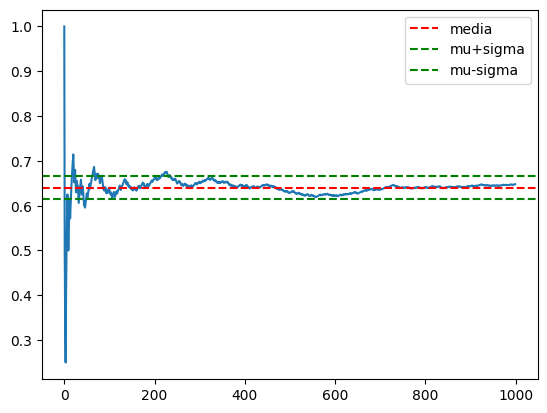

In [10]:
plt.plot(G)
plt.axhline(media, color='r', linestyle='--', label='media') #Grafica una linea vertical en la media
plt.axhline(media + desve, color='g', linestyle='--', label="mu+sigma") #media+desviación estándar
plt.axhline(media - desve, color='g', linestyle='--', label="mu-sigma") #media-desviación estándar

plt.legend() #Mostrar leyenda
plt.show()

###Intervalos de confianza
Suponiendo un nivel de significancia de $\alpha = 95\%$, el intervalo de confianza del parámetro $\mu$ sería:
$$P(-z_{\alpha/2} < \frac{\bar x-\mu_0}{\sigma/\sqrt{n}} < z_{\alpha/2})=1-\alpha$$
$$P(\bar{X}-z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}} < \mu < \bar{X}+z_{\alpha/2}\cdot \frac{\sigma}{\sqrt{n}})=1-\alpha$$
la anterior expresión establece el ancho del intervalo de confianza es:
$$\frac{2z_{α/2}σ}{\sqrt n}$$
Lo cual significa que el tamaño del intervalo sería más pequeño entre mayor sea el número de observaciones.
Estas expresiones, asumen que la **varianza es conocida**

In [21]:
def NvSignificancia(NvAceptacion):
  Nv_significancia=(1-NvAceptacion)/2 #nivel de significancia entre 2
  Acumulado=1-Nv_significancia #probabilidad acumulada
  valor_z=norm.ppf(Acumulado)#la funcion norm.ppf sirve para calcular el valor Z correspondiente a una probabilidad acumulada
  return Nv_significancia,Acumulado,valor_z

In [22]:
n_sd,n,valor_z=NvSignificancia(0.95) #manda a llamar la función con nivel de aceptación del 0.95

In [24]:
np.mean(G) - valor_z*np.std(G)/np.sqrt(50), np.mean(G) + valor_z*np.std(G)/np.sqrt(50) #intervalos de confianza

(0.6330605864338447, 0.6474482535526066)

In [27]:
print(np.mean(G) - valor_z*np.std(G)/np.sqrt(50)," < " , media, " < ", np.mean(G) + valor_z*np.std(G)/np.sqrt(50))

0.6330605864338447  <  0.6402544199932256  <  0.6474482535526066


In [31]:
def simulación(M): #Esta función retorna la simulación de la estimación de pi
 r=[]
 for i in range(M):
  R,a,b,c,d=estimación(500) #fijamos N=500
  r.append(R[-1])
 return r

In [34]:
Z=simulación (1000) #Mando a llamar la función con n=1000

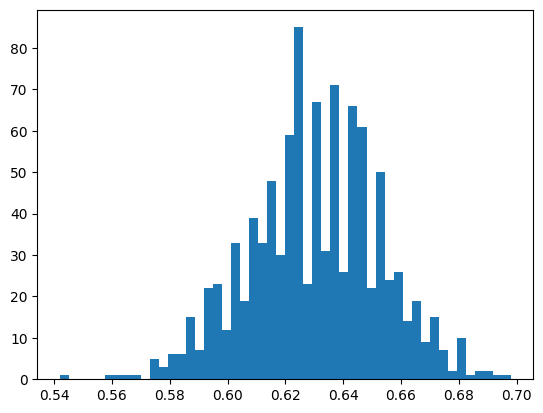

In [35]:
plt.hist(Z,bins=50) #Historgrama
plt.show()

In [36]:
# Realizar la prueba de Kolmogorov-Smirnov para la normalidad
#Siendo la lista D los resultados de la simulación
ks_statistic, p_value = stats.kstest(Z, 'norm', args=(np.mean(Z), np.std(Z, ddof=1)))

print(f'Estadístico KS: {ks_statistic}')
print(f'Valor p: {p_value}')

Estadístico KS: 0.030931401217234922
Valor p: 0.28823645247142327


In [37]:
# Interpretación del valor p
if p_value > 0.05:
    print("No se puede rechazar la hipótesis nula: los datos siguen una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: los datos no siguen una distribución normal.")

No se puede rechazar la hipótesis nula: los datos siguen una distribución normal.


#Monte Carlo de la media muestral

El MC basado en la ley de los grandes números, suele llamarse métoco MC de la Media Muestral.
La aproximación se tiene de
$$I=\frac{1}{n} [g(x_1)+...+g(x_n)]$$
En la ecuación anterior los valores de la variable consisten en una muestra de número pseudoaleatorios uniformes para el mismo intervalo $(0,1)$
donde $g(x)=\sqrt{arctan(x)}$ y $x_i \sim Unif(0,1)$ \
Entonces de la ecuación
$$E[g(X)] = \frac{I}{b-a}\ \text con \ X∼Unif(a,b)$$
Tenemos
$$I=(b-a)E[g(X)]$$
Y un estimador insesgado de esta integral es:
$$\theta_I=(\frac 1n Σ_{i=1}^n g(X_i))$$

In [38]:
def g(x): #Función de la integral
 return np.sqrt(np.arctan(x))

In [39]:
def MCMediaMuestral(a,b,n): #MonteCarlo Media Muestral
 Lista2=[]
 G=0 #Empieza la suma con 0
 for i in range (1,n) : #de 1 hasta n
  u_i=rnd.uniform(0,1) #genera un número aleatorio entre 0 y 1
  X_i=a+u_i*(b-a)
  G+=g(X_i) #Evalua en la función y lo suma
 Media_muestral=(b-a)*(1/n)*G
 Lista2.append(Media_muestral)
 return Media_muestral

In [43]:
V=MCMediaMuestral (0,1,2000) #a=0, b=1, n=1000
print(V)

0.6190710714024857


#Monte Carlo Acierto y error

Consiste en interpretar la integral como el área bajo la curva en una región rectangular, en nuestro ejemplo
$$[0\leq x \leq 1] * [0\leq g(x) \leq c] $$
para algún valor de $c$ que acote la función en todo el intervalo de integración y generar n puntos aleatorios $(x,y)$ sobre dicho rectángulo. \
La probabilidad bajo la curva es
$$p=\frac{I}{c(b-a)}$$
El parámetro $p$ puede ser estimado de:
$$\bar p= \frac {n_a}{n}$$
donde $n_a$ es el número de puntos bajo o sobre la curva (los aciertos) \
Y la integral puede, a su vez, estimada por
$$I\approx \theta_2 = c(b-a) \frac{n_a}{n}$$

In [51]:
def MCAciertoyError(a,b,c,n):
 aciertos=0 #aciertos inicializados en 0
 for i in range(n) :
  u1=rnd.uniform(0, 1) #Genera un número entre 0 y 1
  u2=rnd.uniform(0, 1) #para u1 y u2
  X_i=a+u1*(b-a) #Genera una variable entre a y b
  G=g(X_i) #evalua en g
  if G>c*u2: #condición de acierto
   aciertos+=1
 Estimación=aciertos/n #promedio
 return Estimación #devuelve una lista con los promedios

In [58]:
K=MCAciertoyError (0, 1,1,1000) #a=0, b=1, c=1, n=1000
print(K)

0.619
